<a href="https://colab.research.google.com/github/watermelondruh/KitchenAdventures/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [16]:
import numpy as np
import matplotlib.pyplot as plt

data_2030 = np.loadtxt('/content/drive/MyDrive/ECE M146/UCLA_EE_grad_2030.csv', delimiter=',')
data_2031 = np.loadtxt('/content/drive/MyDrive/ECE M146/UCLA_EE_grad_2031.csv', delimiter=',')
x_2030 = data_2030[:, 0]
y_2030 = data_2030[:, 1]
z_2030 = data_2030[:, 2]
x_2031 = data_2031[:, 0]
y_2031 = data_2031[:, 1]
z_2031 = data_2031[:, 2]
cdict = {-1: 'red', 1: 'blue'}
ldict = {-1: 'Not admitted into UCLA', 1: 'Admitted into UCLA'}

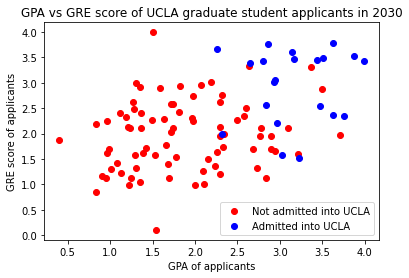

In [17]:
fig, ax = plt.subplots()
for g in np.unique(z_2030):
  ix = np.where(z_2030 == g)
  ax.scatter(x_2030[ix], y_2030[ix], c=cdict[g], label=ldict[g])
ax.legend()
plt.xlabel('GPA of applicants')
plt.ylabel('GRE score of applicants')
plt.title('GPA vs GRE score of UCLA graduate student applicants in 2030')
plt.show()

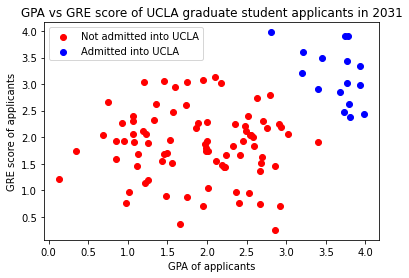

In [18]:
fig, ax = plt.subplots()
for g in np.unique(z_2031):
  ix = np.where(z_2031 == g)
  ax.scatter(x_2031[ix], y_2031[ix], c=cdict[g], label=ldict[g])
ax.legend()
plt.xlabel('GPA of applicants')
plt.ylabel('GRE score of applicants')
plt.title('GPA vs GRE score of UCLA graduate student applicants in 2031')
plt.show()

In [19]:
def perceptron_algorithm(D, MaxIter):
  w = np.array([0, 0])
  b = 0
  u = 0
  for i in range(MaxIter):
    for vec in D:
      a = w[0] * vec[0] + w[1] * vec[1] + b
      if vec[2] * a <= 0:
        u += 1
        w = np.array([w[0] + vec[2] * vec[0], w[1] + vec[2] * vec[1]]) #np.array([vec[0], vec[1], vec[2]])
        b = b + vec[2]
  print('w: [%f, %f]' % (w[0], w[1]))
  print('b: ', b)
  print('u: ', u)
  return w, b

D30 = [[x, y, z] for x, y, z in zip(x_2030, y_2030, z_2030)]
D31 = [[x, y, z] for x, y, z in zip(x_2031, y_2031, z_2031)]
print("learned parameters for UCLA_EE_grad_2030:")
w_30, b_30 = perceptron_algorithm(D30, 1000)
print()
print("learned parameters for UCLA_EE_grad_2031:")
w_31, b_31 = perceptron_algorithm(D31, 1000)

learned parameters for UCLA_EE_grad_2030:
w: [14.300250, 1.093760]
b:  -61.0
u:  11299

learned parameters for UCLA_EE_grad_2031:
w: [5.928160, 3.244720]
b:  -28.0
u:  158


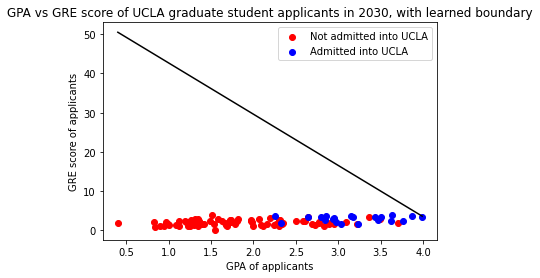

In [20]:
fig, ax = plt.subplots()
for g in np.unique(z_2030):
  ix = np.where(z_2030 == g)
  ax.scatter(x_2030[ix], y_2030[ix], c=cdict[g], label=ldict[g])
line_x = np.linspace(min(x_2030), max(x_2030), num=100)
line_y = -w_30[0] / w_30[1] * line_x - b_30 / w_30[1]
ax.plot(line_x, line_y, c='black')
ax.legend()
plt.xlabel('GPA of applicants')
plt.ylabel('GRE score of applicants')
plt.title('GPA vs GRE score of UCLA graduate student applicants in 2030, with learned boundary')
plt.show()

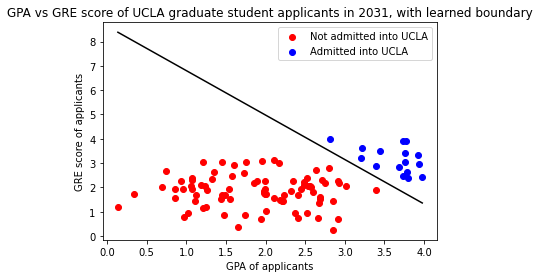

In [21]:
fig, ax = plt.subplots()
for g in np.unique(z_2030):
  ix = np.where(z_2031 == g)
  ax.scatter(x_2031[ix], y_2031[ix], c=cdict[g], label=ldict[g])
line_x = np.linspace(min(x_2031), max(x_2031), num=100)
line_y = -w_31[0] / w_31[1] * line_x - b_31 / w_31[1]
ax.plot(line_x, line_y, c='black')
ax.legend()
plt.xlabel('GPA of applicants')
plt.ylabel('GRE score of applicants')
plt.title('GPA vs GRE score of UCLA graduate student applicants in 2031, with learned boundary')
plt.show()

In [22]:
def calculate_margin(points, a, b, c):
  curr_min = abs(a * points[0][0] + b * points[0][1] + c) / (a ** 2 + b ** 2) ** 0.5
  for point in points:
    d = abs(a * point[0] + b * point[1] + c) / (a ** 2 + b ** 2) ** 0.5
    if d < curr_min:
      curr_min = d
  return curr_min

points = [[x, y] for x, y in zip(x_2031, y_2031)]
gamma = calculate_margin(points, w_31[0], w_31[1], b_31)
print("gamma_{w,b} for UCLA_EE_grad_2031: ", gamma)

gamma_{w,b} for UCLA_EE_grad_2031:  0.200237534964486
